In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 65s 0us/step


In [3]:
# Data preprocessing
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 58s 34ms/step - loss: 1.5183 - accuracy: 0.4448 - val_loss: 1.2701 - val_accuracy: 0.5446
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1330 - accuracy: 0.5999 - val_loss: 1.0814 - val_accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9811 - accuracy: 0.6547 - val_loss: 0.9491 - val_accuracy: 0.6696
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8810 - accuracy: 0.6913 - val_loss: 0.9349 - val_accuracy: 0.6748
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8116 - accuracy: 0.7142 - val_loss: 0.8746 - val_accuracy: 0.6965
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7532 - accuracy: 0.7377 - val_loss: 0.8847 - val_accuracy: 0.6980
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6953 - accuracy: 0.7547 - val_loss: 0.8419 -

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.8859 - accuracy: 0.7122
Test accuracy: 0.7121999859809875


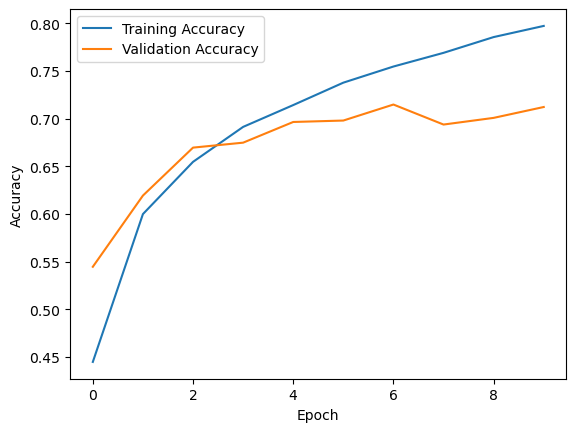

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ==============================================================

# Part - 2

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('housepricedata.csv')

In [12]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [13]:
dataset = df.values

In [14]:
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [15]:
X = dataset[:,0:10]

In [16]:
Y = dataset[:,10]

In [17]:
from sklearn import preprocessing

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [19]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [22]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [23]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [26]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 29ms/step - loss: 0.6760 - accuracy: 0.4990 - val_loss: 0.6739 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6701 - accuracy: 0.4990 - val_loss: 0.6685 - val_accuracy: 0.5023
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6648 - accuracy: 0.5010 - val_loss: 0.6640 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6605 - accuracy: 0.5010 - val_loss: 0.6599 - val_accuracy: 0.5068
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6563 - accuracy: 0.5117 - val_loss: 0.6558 - val_accuracy: 0.5068
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6521 - accuracy: 0.5196 - val_loss: 0.6518 - val_accuracy: 0.5297
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6481 - accuracy: 0.5695 - val_loss: 0.6478 - val_accuracy: 0.5753
Epoch 8

32/32 [==============================] - 0s 11ms/step - loss: 0.3539 - accuracy: 0.8738 - val_loss: 0.3556 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 0s 13ms/step - loss: 0.3500 - accuracy: 0.8767 - val_loss: 0.3524 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3470 - accuracy: 0.8748 - val_loss: 0.3497 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3438 - accuracy: 0.8748 - val_loss: 0.3459 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3404 - accuracy: 0.8748 - val_loss: 0.3424 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3373 - accuracy: 0.8816 - val_loss: 0.3391 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3348 - accuracy: 0.8845 - val_loss: 0.3373 - val_accuracy: 0.8584
Epoch 65/100
3

In [28]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8904


0.8904109597206116

In [29]:
import matplotlib.pyplot as plt

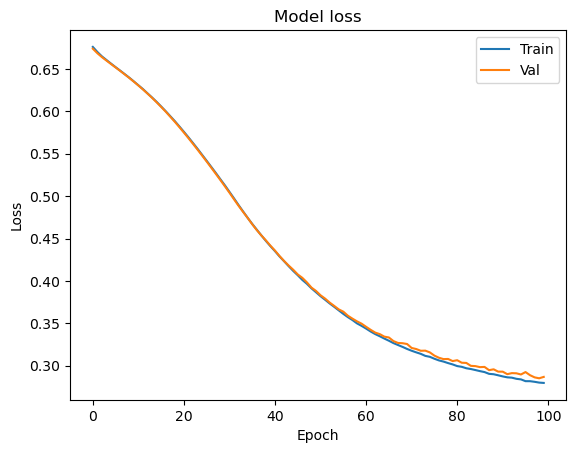

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()